# Prediction of Food Price Index

# Problem Statement:- 
Create a model that can predict future values of the index with accuracy using a variety of variables that affect food prices, and assess the precision and dependability of the model's predictions.

# Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Food_price_indices_data_apr672.csv')
df

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1990-01,64.1,73.4,53.5,64.1,44.59,87.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02,64.5,76.0,52.2,62.2,44.50,90.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03,63.8,77.8,41.4,61.3,45.75,95.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04,65.8,80.4,48.4,62.8,44.02,94.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05,64.4,81.0,39.2,62.0,45.50,90.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2022-11,134.7,114.6,137.4,150.1,154.70,114.4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,2022-12,131.8,112.4,138.2,147.3,144.60,117.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,2023-01,130.3,111.1,135.0,147.5,140.40,116.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,2023-02,129.7,112.1,131.3,146.7,135.90,125.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              399 non-null    object 
 1   Food Price Index  399 non-null    float64
 2   Meat              399 non-null    float64
 3   Dairy             399 non-null    float64
 4   Cereals           399 non-null    float64
 5   Oils              399 non-null    float64
 6   Sugar             399 non-null    float64
 7   Unnamed: 7        0 non-null      float64
 8   Unnamed: 8        0 non-null      float64
 9   Unnamed: 9        0 non-null      float64
 10  Unnamed: 10       0 non-null      float64
 11  Unnamed: 11       0 non-null      float64
 12  Unnamed: 12       0 non-null      float64
 13  Unnamed: 13       0 non-null      float64
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float64
 1

In [4]:
df.isnull().sum()

Date                  0
Food Price Index      0
Meat                  0
Dairy                 0
Cereals               0
Oils                  0
Sugar                 0
Unnamed: 7          399
Unnamed: 8          399
Unnamed: 9          399
Unnamed: 10         399
Unnamed: 11         399
Unnamed: 12         399
Unnamed: 13         399
Unnamed: 14         399
Unnamed: 15         399
Unnamed: 16         399
Unnamed: 17         399
Unnamed: 18         399
Unnamed: 19         399
Unnamed: 20         399
Unnamed: 21         399
Unnamed: 22         399
Unnamed: 23         399
Unnamed: 24         399
Unnamed: 25         399
Unnamed: 26         399
Unnamed: 27         398
Unnamed: 28         399
Unnamed: 29         399
Unnamed: 30         399
Unnamed: 31         399
Unnamed: 32         399
Unnamed: 33         399
Unnamed: 34         399
Unnamed: 35         399
Unnamed: 36         399
Unnamed: 37         399
Unnamed: 38         399
Unnamed: 39         399
Unnamed: 40         399
Unnamed: 41     

As we can see that there are a lot of unnamed coloumns which are filled with null values which do not effect the target value. Hence we are not obligated to remove them or drop them.

In [5]:
# Dropping unnamed coloumns
df.drop(df.iloc[:, 7:66], inplace=True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              399 non-null    object 
 1   Food Price Index  399 non-null    float64
 2   Meat              399 non-null    float64
 3   Dairy             399 non-null    float64
 4   Cereals           399 non-null    float64
 5   Oils              399 non-null    float64
 6   Sugar             399 non-null    float64
dtypes: float64(6), object(1)
memory usage: 21.9+ KB


In [7]:
df.shape

(399, 7)

In [8]:
df.describe()

,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,86.048371,84.442105,84.744612,87.530576,89.676541,81.584461
std,26.360465,17.222946,33.189158,31.914874,38.574228,31.278019
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000
25%,64.000000,70.900000,55.350000,60.200000,62.330000,58.500000
50%,79.800000,82.900000,76.700000,85.700000,81.780000,76.200000
75%,100.700000,97.800000,110.900000,104.150000,107.435000,100.950000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000


<AxesSubplot: >

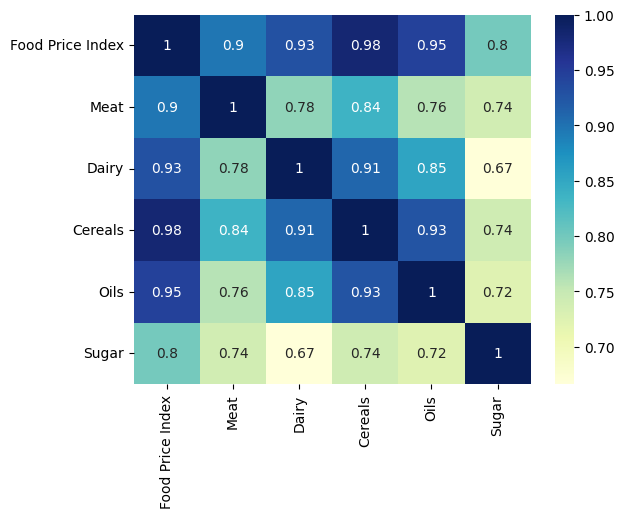

In [9]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

The above heatmap describes about the relation between each and every attribute pressent in the data given from the scale of 0 to 1, where 0 being no relation at all and 1 being totatly dpendent.

As the heatmap depicts the relation between every attribute but as we are intrested in only the relation of every attribute to 'FPI'. It can be noted that all the attributes "Cereals" to "Food Price Index" has the relation of 0.98 highest of all where as "Meat", "Dairy", "Oils" has 0.9, 0.93, 0.95 influence on 'Food Price Index', it is also noted that 'Sugar' has the least influence on 'Food Price Index' of 0.8, but as all the attributes are important hence we consider every attribute present.

# Model Evaluation

In [10]:
X = df.iloc[:,0:1]
X = df.iloc[:, 2:7]
y = df.iloc[:, 1:2]

In [11]:
from pycaret.regression import *
setup(data=df,target="Food Price Index")

,Description,Value
0,Session id,2444
1,Target,Food Price Index
2,Target type,Regression
3,Original data shape,"(399, 7)"
4,Transformed data shape,"(399, 7)"
5,Transformed train set shape,"(279, 7)"
6,Transformed test set shape,"(120, 7)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [12]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0267,0.0010,0.0315,1.0000,0.0004,0.0003,1.7630
lasso,Lasso Regression,0.0603,0.0055,0.0730,1.0000,0.0010,0.0008,0.9010
ridge,Ridge Regression,0.0267,0.0010,0.0315,1.0000,0.0004,0.0003,0.9820
en,Elastic Net,0.0455,0.0032,0.0556,1.0000,0.0007,0.0006,0.9970
lar,Least Angle Regression,0.0267,0.0010,0.0315,1.0000,0.0004,0.0003,0.9490
br,Bayesian Ridge,0.0267,0.0010,0.0315,1.0000,0.0004,0.0003,0.8040
par,Passive Aggressive Regressor,0.0471,0.0034,0.0576,1.0000,0.0007,0.0006,0.9810
huber,Huber Regressor,0.0268,0.0010,0.0316,1.0000,0.0004,0.0003,0.8340
et,Extra Trees Regressor,0.7372,1.0579,1.0131,0.9985,0.0112,0.0086,1.2010
gbr,Gradient Boosting Regressor,1.2336,2.7028,1.6176,0.9960,0.0185,0.0146,1.0110


Using PyCaret we found the models in regression which have the least error scores. From the above table the highlighted rows are the models of regression which have the least error. We can use any one reggression model to predicted the Food Price Index.

In this instasnce we use LinearRegression.

# Model Fitting

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 48)

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(X_train,y_train)

print("Train Score")
print(lin_reg.score(X_train,y_train))
print('Test Score')
print(lin_reg.score(X_test,y_test))

Train Score
0.9999987938938025
Test Score
0.9999982995254669


# Prediction Using Model

In [17]:
prices = [112.1,131.3,146.7,135.90,125.2]
predicted = lin_reg.predict([prices])
print(predicted)

[[129.68841013]]
